In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from functools import partial
from plotnine import *
from sklearn.inspection import *

# Venda em Varejo
<img src="https://files.nsctotal.com.br/s3fs-public/graphql-upload-files/P%C3%A1gina_TOP_Divulga%C3%A7%C3%A3o_Varejo.jpg?0E4nLroL8Td0Wcf.KRLiMVYmBcAEYUPI" width="400" height="100"/>



|         Dicionário        |                                                                                            |
|:-------------------------:|:------------------------------------------------------------------------------------------:|
|      Item_Identifier      |                                      ID único de produto                  |
| Item_Weight               | Peso do Produto                                                                         |
| Item_Fat_Content:         | Se o produto tem baixo teor de gordura ou não                                                     |
| Item_Visibility           | The % of total display area of all products in a store allocated to the particular product |
| Item_Type                 | A categoria à qual o produto pertence                                                  |
| Item_MRP                  | Preço máximo de varejo (preço de lista) do produto                                         |
| Outlet_Identifier         | ID de loja única                                                                           |
| Outlet_Establishment_Year | O ano em que a loja foi criada                                                    |
| Outlet_Size               | O tamanho da loja em termos de área coberta                                      |
| Outlet_Location_Type      | O tipo de cidade em que a loja está localizada                                             |
| Outlet_Type               | Seja o ponto de venda apenas uma mercearia ou algum tipo de supermercado                     |
| Item_Outlet_Sales         | Vendas do produto na loja específica. Esta é a variável de resultado a ser prevista |

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Big-Mart-Sales-Prediction/master/train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Ver se tem valores fora do padrão

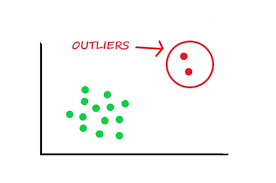

<AxesSubplot:>

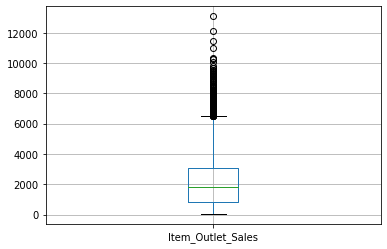

In [12]:
df[['Item_Outlet_Sales']].boxplot()

## Separar em target e feature

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img12.png?raw=true" width="300" height="100"/>

In [13]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Tratar Valor Vazio

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img6.png?raw=true" width="400" height="150"/>

## Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img5.png?raw=true" width="350" height="100"/>

In [19]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='mean', missing_values=np.nan),
                                    MinMaxScaler())

# Categóricas em numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="600" height="100"/>

In [20]:
categorical_transformer = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                                        OneHotEncoder(handle_unknown='ignore')
                                       )

In [25]:
X.select_dtypes(include = 'object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [26]:
preprocessor = make_column_transformer(
        (numeric_transformer, ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year']),
        (categorical_transformer,['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']))

## Treinar o modelo com os principais algorítimos supervisionados de Regressão

<img src="https://i.ibb.co/87M89qH/LR-LDA-DT-KNN-SVM-RF-1.png" width="200" height="80"/>

In [27]:
LR = make_pipeline(preprocessor,LinearRegression()).fit(X_train, y_train)
GLMNET = make_pipeline(preprocessor,ElasticNet()).fit(X_train, y_train)
CART = make_pipeline(preprocessor,DecisionTreeRegressor()).fit(X_train, y_train)
SVM = make_pipeline(preprocessor, SVR()).fit(X_train,y_train) 
KNN = make_pipeline(preprocessor,KNeighborsRegressor()).fit(X_train,y_train) 

In [30]:
predict_train_LR = LR.predict(X_train)
predict_test_LR = LR.predict(X_test)

predict_train_GLMNET = GLMNET.predict(X_train)
predict_test_GLMNET = GLMNET.predict(X_test)

predict_train_CART = CART.predict(X_train)
predict_test_CART = CART.predict(X_test)

predict_train_SVM = SVM.predict(X_train)
predict_test_SVM = SVM.predict(X_test)

predict_train_KNN = KNN.predict(X_train)
predict_test_KNN = KNN.predict(X_test)

In [31]:
test_y = pd.DataFrame(y_test)
test_y['predito_LR'] = predict_test_LR
test_y['predito_GLMNET'] = predict_test_GLMNET
test_y['predito_CART'] = predict_test_CART
test_y['predito_SVR'] = predict_test_SVM
test_y['predito_KNN'] = predict_test_KNN

In [32]:
test_y

,Item_Outlet_Sales,predito_LR,predito_GLMNET,predito_CART,predito_SVR,predito_KNN
7503,1743.0644,863.948319,2167.867079,554.6114,1810.864359,1098.30368
2957,356.8688,1037.826985,1930.564021,1249.0408,1767.706882,1218.28084
7031,377.5086,1065.697510,2083.487355,162.4552,1792.407741,1507.23804
1084,5778.4782,3681.935409,2717.231141,4763.7990,1866.157456,3906.78124
856,2356.9320,2219.132681,2370.599676,4364.9848,1844.544462,3765.89796
...,...,...,...,...,...,...
2418,1592.5936,1217.610632,2186.217663,355.5372,1813.981074,1220.67772
5412,3705.8428,2708.789159,2375.645891,2358.2636,1841.299154,2427.50680
6463,1258.3620,2665.494194,2421.186009,858.8820,1850.251274,3511.69552
3805,2182.4924,2724.803969,2220.586849,1587.2672,1801.038014,1932.28476


## Métricas de Modelo Supervisonado de Regressão


Aqui há três métricas comuns para problema de regressão:

**Mean Absolute Error** (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando essas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular do que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque RMSE pode ser interpretado nas unidades "y".

In [33]:
mae_test_LR = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_LR'])
mae_test_GLMNET = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_GLMNET'])
mae_test_CART = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_CART'])
mae_test_SVR = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_SVR'])
mae_test_KNN = mean_absolute_error(test_y['Item_Outlet_Sales'],test_y['predito_KNN'])

mse_test_LR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_LR'])
mse_test_GLMNET = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_GLMNET'])
mse_test_CART = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_CART'])
mse_test_SVR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_SVR'])
mse_test_KNN = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_KNN'])

rmse_test_LR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_LR'])**(0.5)
rmse_test_GLMNET = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_GLMNET'])**(0.5)
rmse_test_CART = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_CART'])**(0.5)
rmse_test_SVR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_SVR'])**(0.5)
rmse_test_KNN = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_KNN'])**(0.5)

In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
metricas = {
        'MAE':  [mae_test_LR,
                 mae_test_GLMNET,
                 mae_test_CART,
                 mae_test_SVR,
                 mae_test_KNN
                      ],
        'MSE': [mse_test_LR,
                mse_test_GLMNET,
                mse_test_CART,
                mse_test_SVR,
                mse_test_KNN
                      ],
        'RMSE' :   [rmse_test_LR,
                    rmse_test_GLMNET,
                    rmse_test_CART,
                    rmse_test_SVR,
                    rmse_test_KNN
                      ]
        }

dados = pd.DataFrame(metricas, columns = ['MAE', 'MSE','RMSE'], index=['LR','GLMNET','CART','SVR','KNN'])

dados

,MAE,MSE,RMSE
LR,978.784,1722341.557,1312.380
GLMNET,1179.266,2214337.602,1488.065
CART,1017.333,2163424.531,1470.858
SVR,1259.508,2792370.249,1671.039
KNN,870.001,1461926.894,1209.102
